![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 1:</b> <br>

a) Implemente um programa para a solução do sistema de quatro equações: <br>
* A implementação esta presente no arquivo Hodkin_Huxley.py <br>

b) Use como método numérico o método de Euler com passo de integração igual a 0,001
ms: <br>
* No caso fora utilizado as equações de Isoda implementadas pelo [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) em FORTRAN. <br>

c) Explique o comportamento observado de V(t) em termos das
variáveis de gating n(t), m(t) e h(t): <br>
* Podemos observar que de início há um breve período (menor que 1 milisegundo) em que m(t) aumenta infímamente, algo em torno de 0.001 o que provoca uma pequena, porém de forma abrupta, entrada de Na2+ no neurônio propiciando a diminuição da voltagem do sistema. Concomitantemente, essa diminuição da voltagem acarreta também numa entrada de íons de K+, porém num período bem maior se comparado ao perído de entrada do Na2+ (~5 milisegundos) algo que estimula ao longo do tempo o sistema de forma a  convergir a voltagem ao valor zero.<br>

d) Gráfico Observado nas células de código abaixo: <br>
</div>

In [1]:
import numpy as np
import pylab as plt

from Hodkin_Huxley import HodgkinHuxley

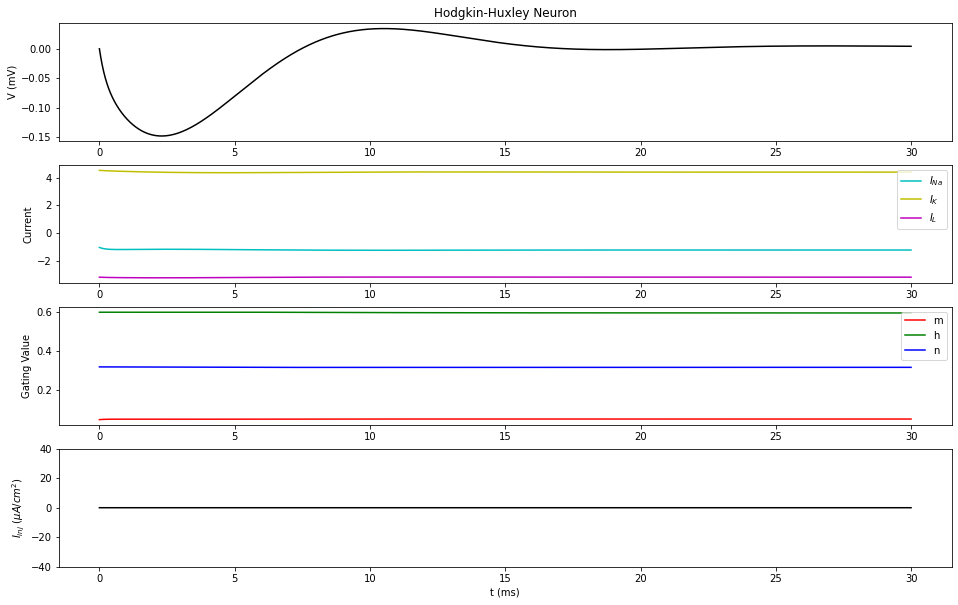

In [2]:
runner = HodgkinHuxley(exp_time=30)
_ = runner.run(J=[0], times=[(0, 0)])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 2:</b> <br>

a) Tente encontrar o menor valor de J com esta duração que provoque um
potencial de ação: <br>
* O menor valor de J que propicia um potencial de ação nas primeiras tentativas com um intervalo de corrente entre 2 a 20 é de 14 µA/cm². <br>

b) Determine o intervalo em que ocorre a transição de não
disparo para um disparo: <br>
* O intervalo dura algo em torno de (0.5 +- 0.05) ms próximo do tempo de 13 ms da simulação. <br>

c) Faça simulações
para J dentro desse intervalo com incrementos de 0,5 e determine um novo intervalo menor
em que ocorre a transição: <br>
* Agora o menor valor de J que propicia um potencial de ação encontrado é de 13.5 µA/cm².<br>

d) Repita o processo dentro desse intervalo menor com incrementos
de 0,01 em J e obtenha um intervalo menor ainda: <br>
* Agora o menor valor de J que propicia um potencial de ação encontrado é de 13.12 µA/cm².<br>
</div>

In [3]:
def search_for_aproximation_threshold_for_action_potential(
    times, Ji, Jf, step, exp_time
):
    """Searches for aproximation threshold for action potential.

    Parameters
    ----------
    times : list[tuple]
        The initial and final times for each pulse.
    Ji : float
        Start current amplitude, in uA/cm^2.
    Jf : float
        End current amplitude, in uA/cm^2.
    step : float
        Step of search for current amplitude, in uA/cm^2.
    exp_time : int
        Experiment time, in ms.
    """
    runner = HodgkinHuxley(exp_time=exp_time)

    injection_currents = np.arange(Ji, Jf, step)

    for j in injection_currents:
        print(f"Injection Current: {j}")
        runner.run([j], times)

In [ ]:
# Busca feita para o tópico a) da questão:
search_for_aproximation_threshold_for_action_potential([(10, 10.5)], 2.0, 20.0, 2, 30)

In [ ]:
# Busca feita para o tópico c) da questão:
search_for_aproximation_threshold_for_action_potential([(10, 10.5)], 2.0, 20.0, 0.5, 30)

In [ ]:
# Busca feita para o tópico d) da questão:
search_for_aproximation_threshold_for_action_potential(
    [(10, 10.5)], 13.11, 13.13, 0.01, 30
)

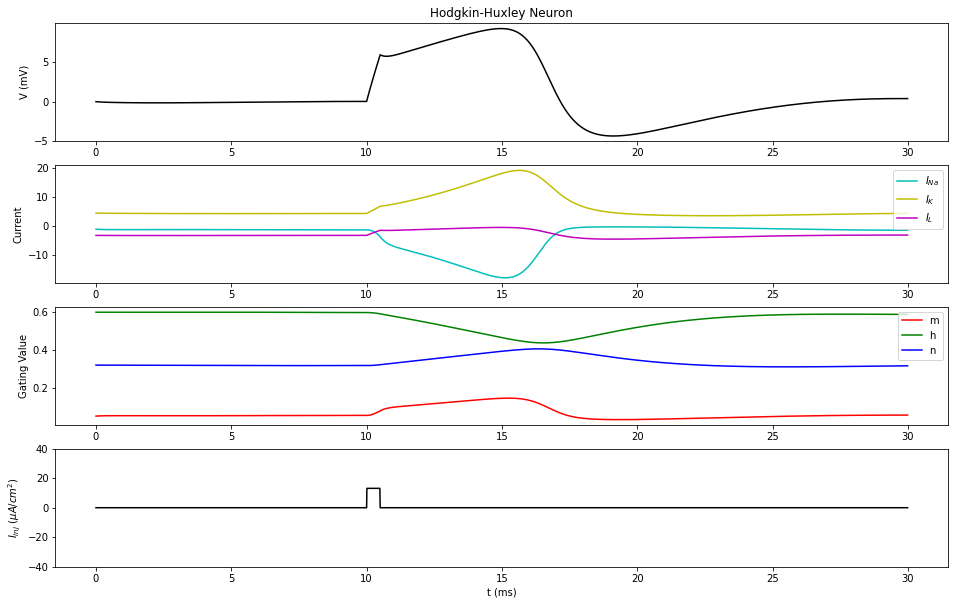

In [25]:
# Gráficos gerados para os dois valores de J do menor intervalo obtido por você

# maior valor que não gera um potencial de ação
runner = HodgkinHuxley(exp_time=30)
_ = runner.run(J=[13.11], times=[(10, 10.5)])

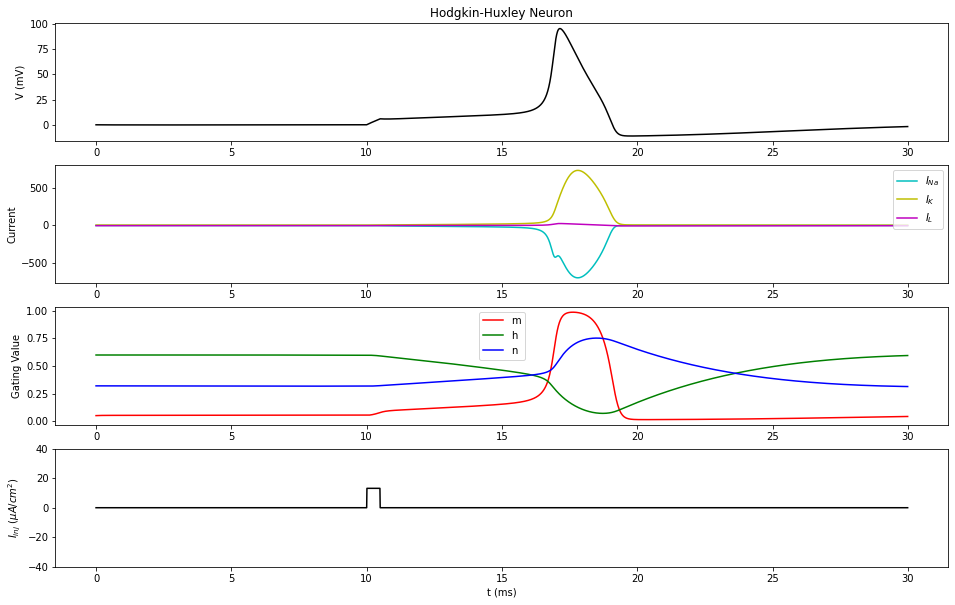

In [28]:
# menor valor que gera um potencial de ação

runner = HodgkinHuxley(exp_time=30)
_ = runner.run(J=[13.12], times=[(10, 10.5)])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 3:</b> <br>

a) Como o menor valor estimado de J capaz de provocar um disparo neste caso se
compara com o menor valor de J estimado na questão anterior: <br>
* Agora o menor valor de J que propicia um potencial de ação encontrado é de 6.84 µA/cm² o que é praticamente a metade do menor valor anterior de 13.12 µA/cm². Será que existe uma correlação entre as variáveis? Provavelmente.<br>
</div>

In [ ]:
# Busca similar a questão anterior parte a) porém com os parâmetros desta questão:
search_for_aproximation_threshold_for_action_potential([(10, 11)], 2.0, 20.0, 2, 30)

In [ ]:
# Busca similar a questão anterior parte c) porém com os parâmetros desta questão:
search_for_aproximation_threshold_for_action_potential([(10, 11)], 6.0, 10.0, 0.5, 30)

In [ ]:
# Busca similar a questão anterior parte d) porém com os parâmetros desta questão:
search_for_aproximation_threshold_for_action_potential([(10, 11)], 6.8, 6.9, 0.01, 30)

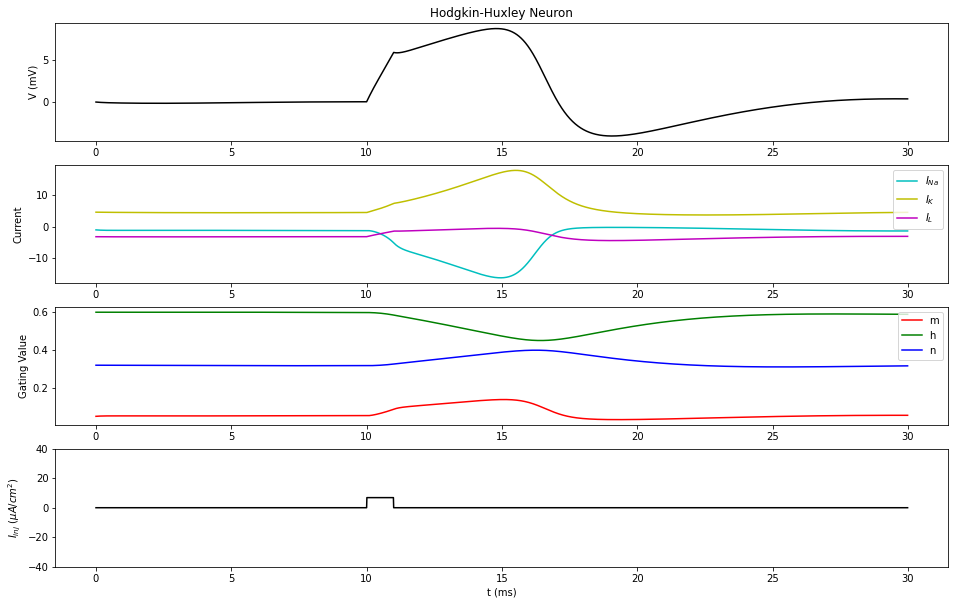

In [29]:
# Gráficos gerados para os dois valores de J do menor intervalo obtido por você

# maior valor que não gera um potencial de ação
runner = HodgkinHuxley(exp_time=30)
_ = runner.run(J=[6.83], times=[(10, 11)])

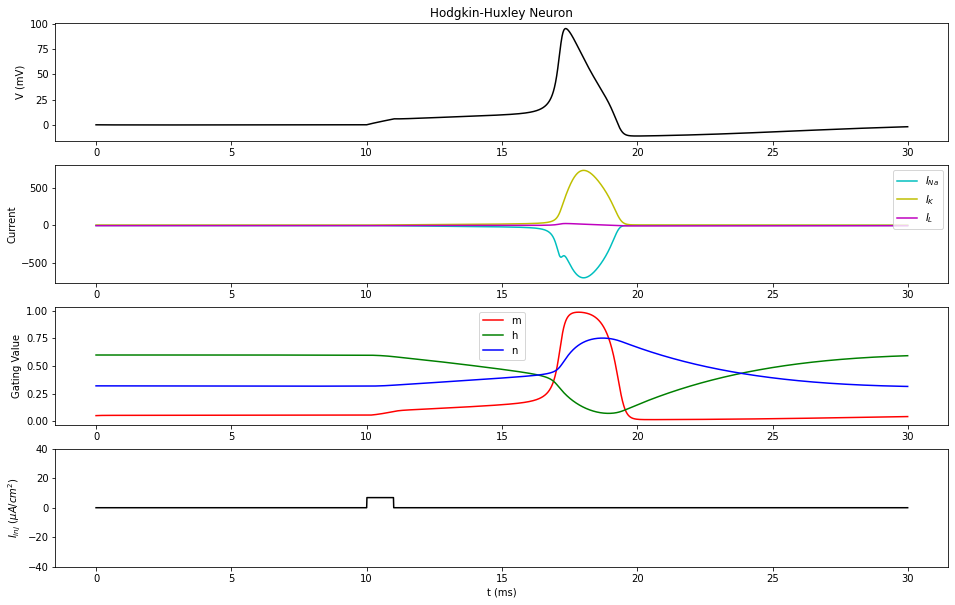

In [30]:
# menor valor que gera um potencial de ação
runner = HodgkinHuxley(exp_time=30)
_ = runner.run(J=[6.84], times=[(10, 11)])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 4:</b> <br>

a) Tente
encontrar o menor valor de J capaz de produzir um disparo: <br>
* Neste caso o menor valor de J que propicia um potencial de ação encontrado é de 2.24 µA/cm².<br>

b) Define-se a corrente de reobase
como a menor corrente de duração infinita capaz de provocar um disparo em um neurônio.
Portanto, o seu estudo resultará em uma aproximação para a corrente de reobase do modelo
de Hodgkin-Huxley: <br>
* A aproximação da corrente de reobase encontrada para um intervalo de 5000 ms é de 2.34 µA/cm². <br>

c) Depois de determinar a densidade de corrente de reobase, tente encontrar a densidade de
corrente J que produz dois disparos: <br>
* A aproximação da corrente encontrada para efetuar dois disparos em um intervalo de 5000 ms é de 5.97 µA/cm². <br>

d) tente determinar a densidade de corrente
J que produz um trem de disparos enquanto durar a simulação: <br>
* A aproximação da corrente encontrada para efetuar um trem de disparos em um intervalo de 5000 ms é de 6.27 µA/cm². <br>
</div>

In [ ]:
# Busca similar as questões 2 e 3 porém com os parâmetros da parte a) desta questão:
search_for_aproximation_threshold_for_action_potential([(50, 450)], 2.0, 2.5, 0.05, 500)

In [ ]:
# Busca similar as questões 2 e 3 porém com os parâmetros da parte b) desta questão:
search_for_aproximation_threshold_for_action_potential(
    [(0, 5000)], 2.33, 2.36, 0.01, 5000
)

In [ ]:
# Busca similar as questões 2 e 3 porém com os parâmetros da parte c) desta questão:
search_for_aproximation_threshold_for_action_potential(
    [(0, 5000)], 5.95, 6.01, 0.01, 5000
)

In [ ]:
search_for_aproximation_threshold_for_action_potential(
    [(0, 5000)], 6.2, 6.3, 0.01, 5000
)

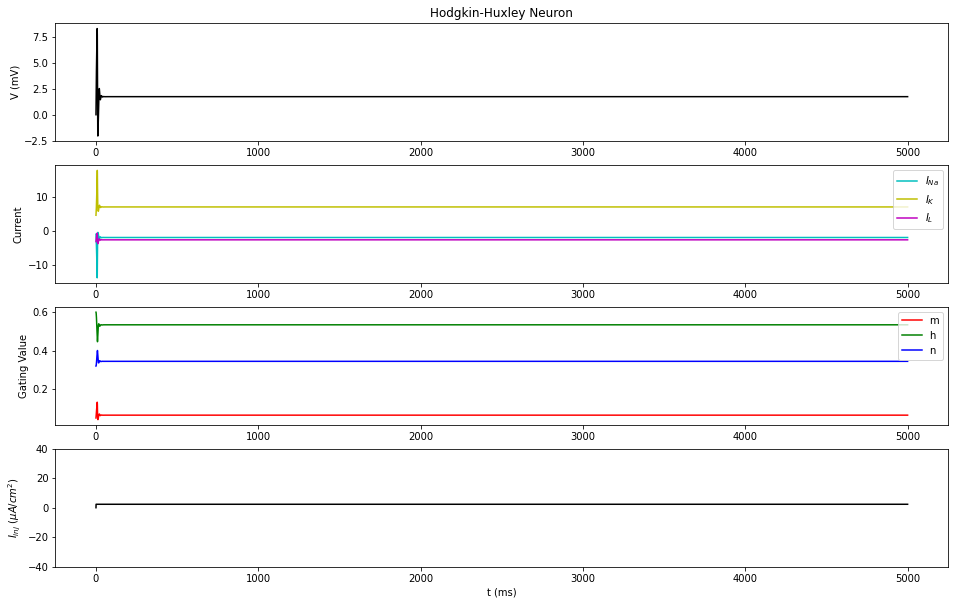

In [41]:
# Gráficos gerados para quatro casos:
#  (i) Um valor de J que não produz disparos;
runner = HodgkinHuxley(exp_time=5000)
_ = runner.run(J=[2.33], times=[(0, 5000)])

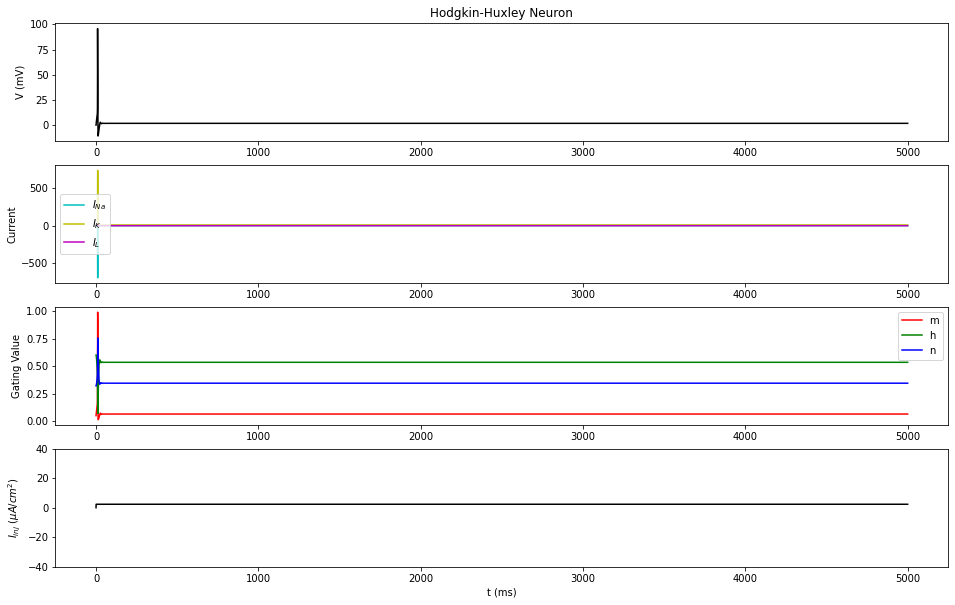

In [42]:
# (ii) o valor de J de reobase;
runner = HodgkinHuxley(exp_time=5000)
_ = runner.run(J=[2.34], times=[(0, 5000)])

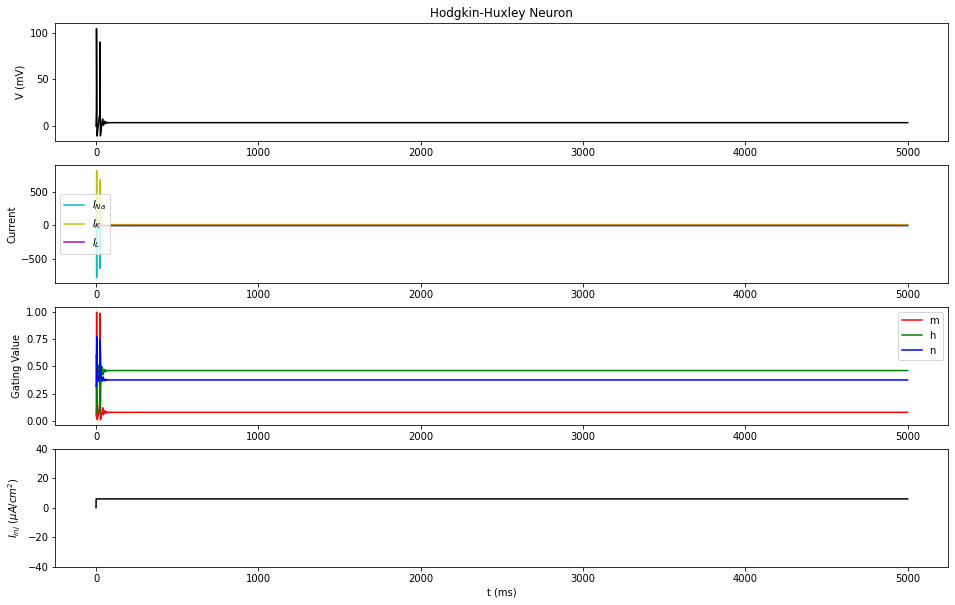

In [43]:
# (iii) o valor de J que produz dois disparos;
runner = HodgkinHuxley(exp_time=5000)
_ = runner.run(J=[5.97], times=[(0, 5000)])

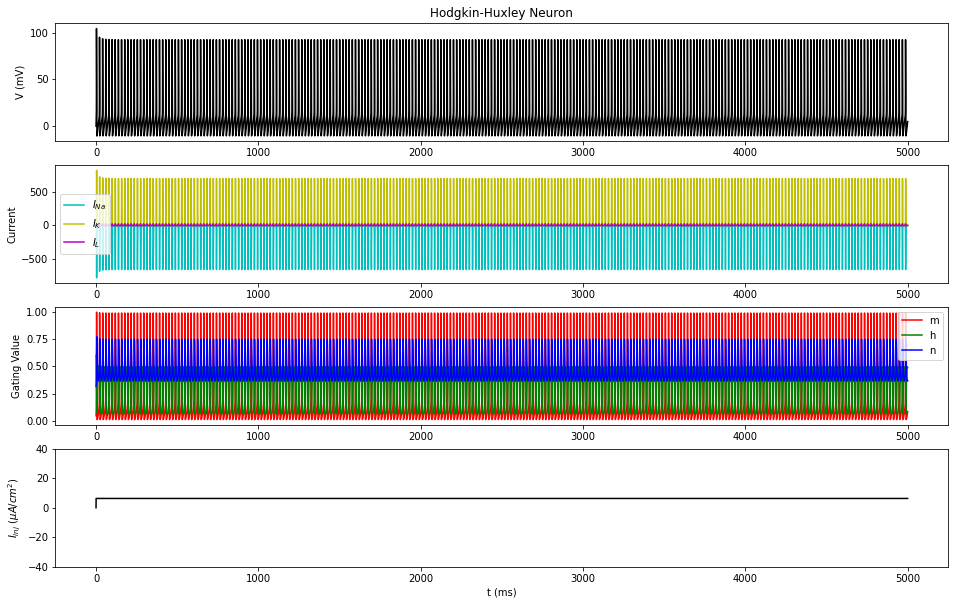

In [44]:
# (iv) o menor valor de J capaz de produzir um trem de disparos pela duração da simulação.
runner = HodgkinHuxley(exp_time=5000)
_ = runner.run(J=[6.27], times=[(0, 5000)])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 5:</b> <br>
OBS: os valores de J variaram de 7 a 150 de 2 em 2, com um intervalo de 1000 ms. <br>

a) Descreva e justifique o critério usado por você
para determinar a frequência de disparos do modelo para cada valor de I: <br>
* Para determinar a frequência de disparos do modelo, simplesmente foi utilizado a derivada em cada ponto da curva de V(t) que estava acima de 80 mV e verificado quando o sinal era invertido, ou seja, quando um pico terminava.<br>

b) Qual é a frequência
mı́nima do trem de disparos?: <br>
* A frequência mínima encontrada foi de 1. <br>

c) Existe uma frequência máxima? Caso exista, qual é ela?: <br>
* Ao que parece existe um máximo e é de 106.0 pulsos. <br>

d) Você consegue explicar
por que não ocorrem disparos repetidos com frequências acima da frequência máxima: <br>
* Isso acontece devido a existência do período refratário absoluto do neurônio, o que limita o número máximo de potenciais de ativação em um determinado período de tempo. <br>
</div>

In [58]:
def get_number_of_action_potencial(V):
    """Get number of action potentials.

    Parameters
    ----------
    V : array
        The return from Hodkin & Huxley run Voltage vector.
    """
    V_threshold = V[V > 80]
    asign = np.sign(V_threshold[:-1] - V_threshold[1:])
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return len(signchange[signchange == 1]) / 2

In [59]:
runner = HodgkinHuxley(exp_time=1000)

all_activation_potencials = []
current_injections = np.arange(7, 150, 2)

for j in current_injections:
    V, m, h, n, ina, ik, il, i_inj_values = runner.run(
        J=[j], times=[(0, 1000)], plot=False
    )
    all_activation_potencials.append(get_number_of_action_potencial(V))

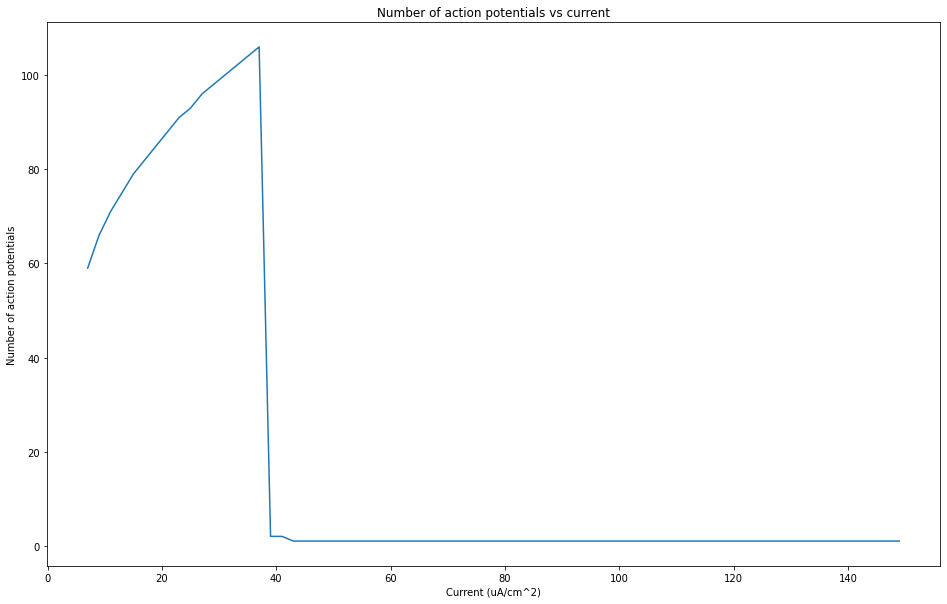

The max number of action potencials was 106.0 Hz
The min number of action potencials was 1.0 Hz


In [60]:
plt.figure(figsize=(16, 10))
plt.plot(current_injections, np.array(all_activation_potencials))
plt.xlabel("Current (uA/cm^2)")
plt.ylabel("Number of action potentials")
plt.title("Number of action potentials vs current")
plt.show()

print(f"The max number of action potencials was {max(all_activation_potencials)} Hz")
print(f"The min number of action potencials was {min(all_activation_potencials)} Hz")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 6:</b> <br>

a) Inicialmente, faça J2 = J1 e tente encontrar o menor valor
de L tal que o segundo pulso produza um potencial de ação: <br>
* O menor valor de L que propicia um potencial de ação é 22 ms. <br>

b) Em seguida, repita o que foi feito para alguns
valores de J2 maiores que J1 e tente encontrar o perı́odo refratário absoluto do modelo: <br>
* O período refratário absoluto do modelo encontrado foi de 12 ms. Para J2 maior que 88 <br>

</div>

In [ ]:
# Busca pelo menor valor de L tal que o segundo pulso produza um potencial de ação.
runner = HodgkinHuxley(exp_time=80)

interval = np.arange(20, 23, 1)

for l in interval:
    runner.run(J=[13.12, 13.12], times=[(10, 10.5), (10 + l, 10.5 + l)])
    print(f"O tamanho de L atual é de: {l}")

In [ ]:
# Busca pelo valor do período refratário absoluto do modelo.
runner = HodgkinHuxley(exp_time=80)

interval = np.arange(11, 15, 1)
current_j2 = np.arange(80, 100, 2)

for j2 in current_j2:
    for i in interval:
        runner.run(J=[13.15, j2], times=[(10, 10.5), (10 + i, 10.5 + i)])
        print(j2, i)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.5em;">

<b>Questão 7:</b> <br>

a) Simule agora a resposta do modelo a uma corrente hiperpolarizante, isto é,
negativa e tente observar o fenômeno de estimulação de quebra de anodo.: <br>
* O menor valor de L que propicia um potencial de ação é 21 ms. <br>

b) Qual o menor valor de T para
o qual um potencial de ação é gerado após o desligamento da corrente hiperpolarizante? E
qual o atraso entre o instante do término da corrente e o instante do inı́cio do potencial de
ação? Considere que o potencial de ação se inicia quando V ≥ 20 mV: <br>
* O menor valor de T que gera um potencial de ação é de 1.5ms. 
O final da injeção de corrente se deu em torno de 11.5 ms enquanto o início do potencial foi averiguado no tempo em torno de ~20.5 ms. Logo, o atraso entre o instante de término da corrente e o instante de início do potencial de ação é de ~9ms. <br>

</div>

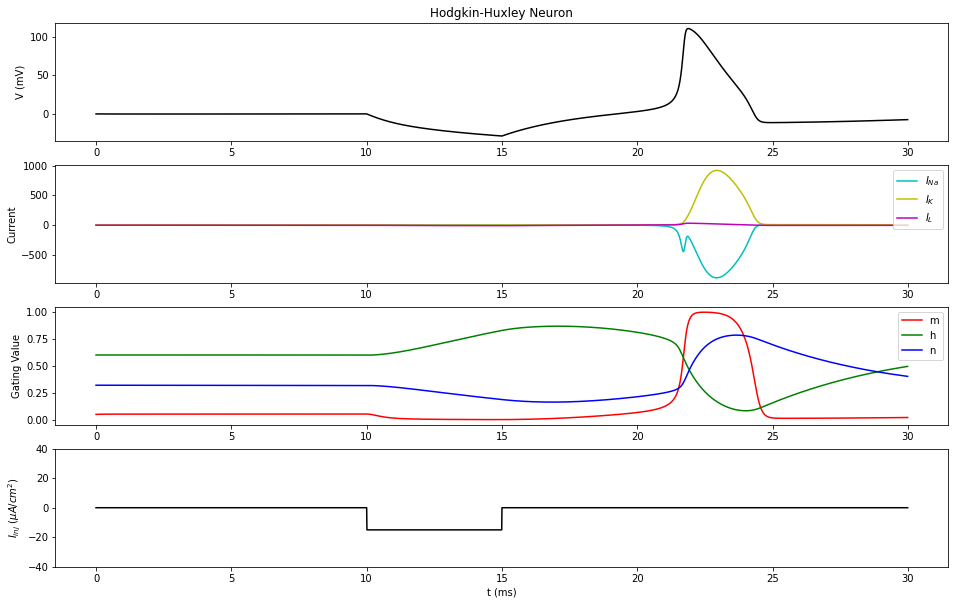

In [20]:
# Vizualizando o fenômeno da quebra de anodo.
runner = HodgkinHuxley(exp_time=30)

_ = runner.run(J=[-15], times=[(10, 15)])

In [ ]:
# Simulação deixando o valor da corrente estático, porém variando seu intervalo de aplicação.
runner = HodgkinHuxley(exp_time=30)

intervals = np.arange(0, 5.1, 0.5)

for i in intervals:
    _ = runner.run(J=[-15], times=[(10, 10 + i)])
    print(f"O menor valor de T é de: {i}.")

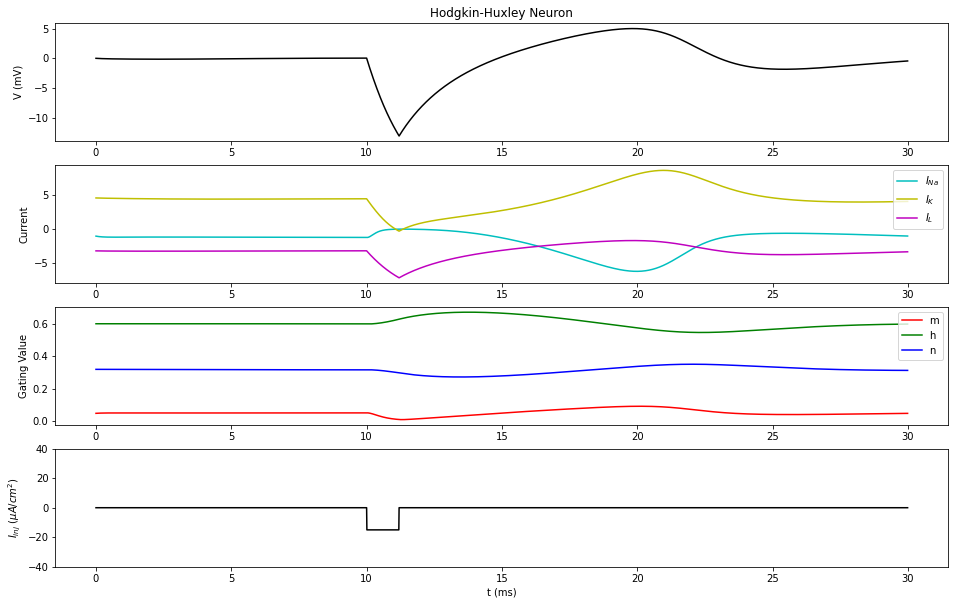

In [57]:
# Gráficos gerados para dois valores diferentes de T:
# (i) O qual não ocorre um potencial de ação
runner = HodgkinHuxley(exp_time=30)

_ = runner.run(J=[-15], times=[(10, 11.2)])

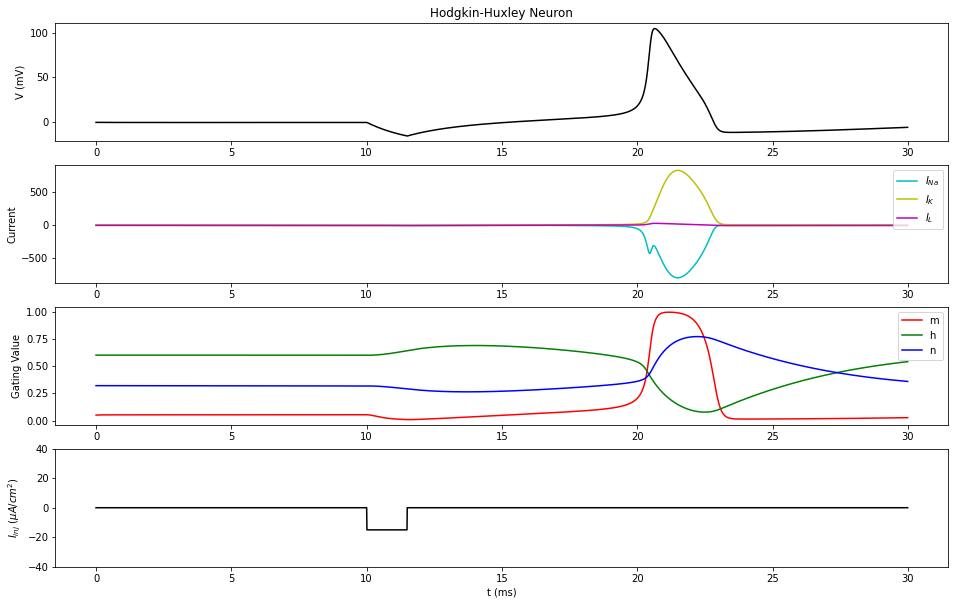

In [55]:
# (ii) Outro para o qual ocorre um potencial de ação.
runner = HodgkinHuxley(exp_time=30)

_ = runner.run(J=[-15], times=[(10, 11.5)])